<div class="alert alert-block alert-success">
    
    
# <center> Project Phase 4 </center>


<br>
    
</div>


<div class="alert alert-info">

## <center> Requirements </center>


</div>


In [1]:
import os
import pandas as pd
import numpy as np
import datetime

import pystan
import prophet
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from prophet.plot import plot_plotly, plot_components_plotly

In [2]:
os.chdir('./data')

In [3]:
df = pd.read_csv('Transactions.csv')

In [4]:
df.columns

Index(['CustomerID', 'FirstName', 'LastName', 'CreditCardNumber', 'OrderID',
       'Customer_Occupation', 'Credit_Card_Number', 'Order_ID', 'Order_Date',
       'Expected_Delivery_Date', 'Actual_Delivery_Date', 'Product_ID',
       'Product_Name', 'Category', 'Manufacturer', 'Review_Rating',
       'Delivery_Tracking_ID', 'Delivery_Type', 'Delivery_Zip_Code',
       'Transaction_Status', 'Order_Returned', 'Order_Delivered_on_Time'],
      dtype='object')

In [6]:
# Conversions to datetime dtypes

df['Expected_Delivery_Date'] = pd.to_datetime(df['Expected_Delivery_Date'])
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Actual_Delivery_Date'] = pd.to_datetime(df['Actual_Delivery_Date'])

df['Expected_Delivery_Year'] = df['Expected_Delivery_Date'].dt.year
df['Expected_Delivery_Month'] = df['Expected_Delivery_Date'].dt.month
df['Expected_Delivery_Day'] = df['Expected_Delivery_Date'].dt.day
df['Expected_Delivery_Week_of_Year'] = df['Expected_Delivery_Date'].dt.isocalendar().week
df['Expected_Delivery_Day_of_Week'] = df['Expected_Delivery_Date'].dt.dayofweek

df['Order_Date_Year'] = df['Order_Date'].dt.year
df['Order_Date_Month'] = df['Order_Date'].dt.month
df['Order_Date_Day'] = df['Order_Date'].dt.day
df['Order_Date_Week_of_Year'] = df['Order_Date'].dt.isocalendar().week
df['Order_Date_Day_of_Week'] = df['Order_Date'].dt.dayofweek

df['Actual_Delivery_Year'] = df['Actual_Delivery_Date'].dt.year
df['Actual_Delivery_Month'] = df['Actual_Delivery_Date'].dt.month
df['Actual_Delivery_Day'] = df['Actual_Delivery_Date'].dt.day
df['Actual_Delivery_Week_of_Year'] = df['Actual_Delivery_Date'].dt.isocalendar().week
df['Actual_Delivery_Day_of_Week'] = df['Actual_Delivery_Date'].dt.dayofweek

<div class="alert alert-warning">
1.	Create Customer-Friends-Product-Reviews graph database for OnMart

<br><br>
    
    
**Use PurchasesLog Dataset**
    
<br><br>
    

</div>

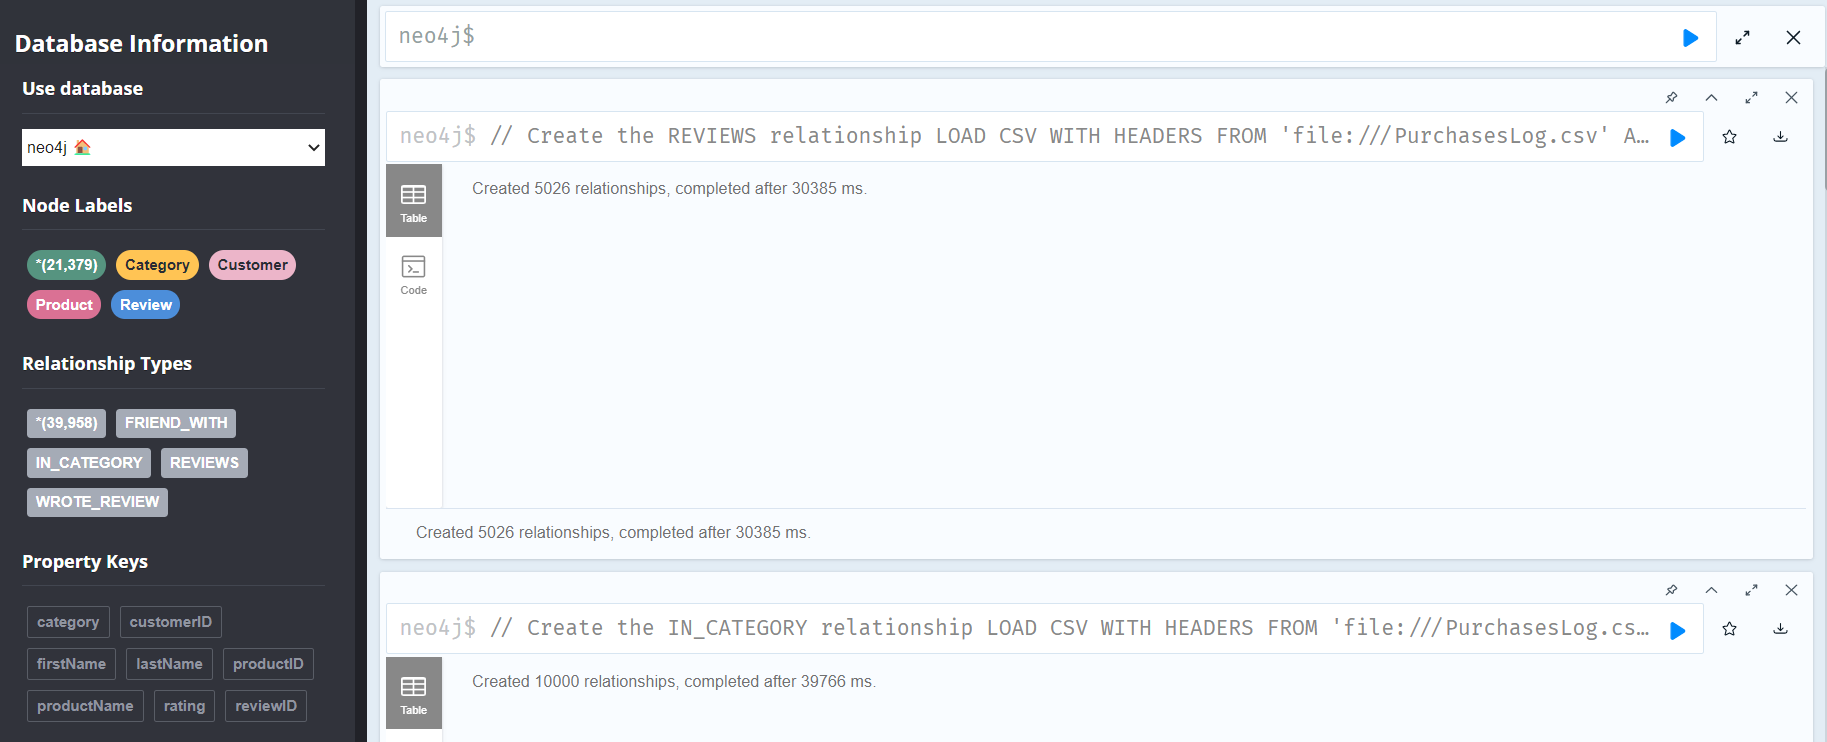

<div class="alert alert-warning">
2.	Use Google PageRank, and the graph database that you created above for customer reviews/ratings to find influential reviewers
    
<br><br>
    
    
**Use PurchasesLog Dataset**
    
<br><br>
    
    
    
</div>

<div class="alert alert-warning">
3.	Use Betweenness Centrality and PageRank algorithms to find which OnMart superstore super-connected and influential reviewers  who can be used  to identify products from the Furniture department that it could use in a cross-promotion with the newly introduced Samsung TV  in the Electronics department
    
    
<br><br>
    
    
**Use PurchasesLog Dataset**
    
<br><br>
    
    
    
</div>

<div class="alert alert-warning">
4.	The day of the week that has the maximum number of purchases made 
</div>

## REDO THIS AND USE PROPHET

In [69]:


# Map each date to the day of the week (0 is Monday, 6 is Sunday)
df["Order_Date"] = pd.to_datetime(df["Order_Date"])
df['day_of_week'] = df['Order_Date'].dt.dayofweek

question4 = df.groupby('day_of_week')['CustomerID'].count().reset_index(name='Count')

In [46]:
question4['Count'].max()

2584

In [49]:
# The day of the week that has the maximum number of purchases made is #3 or Thursday.
question4

,day_of_week,Count
0,0,2222
1,1,2289
2,2,2493
3,3,2584
4,4,2484
5,5,2251
6,6,2049


<div class="alert alert-warning">
5.	The month of the year that has the highest sales revenue
</div>

In [57]:
# This question asks for which month has the most purchases in the past

df['month'] = df['Order_Date'].dt.month

In [67]:
temp_q5 = purchases[['OrderID', 'Quantity', 'Price', 'ShippingCost', 'Discount', 'Sales', 'Profit']]
question5 = pd.merge(df, temp_q5, how='left', on=['OrderID'])

In [68]:
question5

,CustomerID,FirstName,LastName,CreditCardNumber,OrderID,Customer_Occupation,Credit_Card_Number,Order_ID,Order_Date,Expected_Delivery_Date,...,Order_Returned,Order_Delivered_on_Time,day_of_week,month,Quantity,Price,ShippingCost,Discount,Sales,Profit
0,566-26-0321,Rebeka,Stokes,xxxx-xxxx-xxxx-2650,50787284-d78d-4b6a-b93f-7419b0d46590,Lawyer,12345789032,98,2020-04-07,4/11/2020,...,1,1,1,4,NaN,NaN,NaN,NaN,NaN,NaN
1,274-18-0017,Rahsaan,Koch,xxxx-xxxx-xxxx-5055,f61639d7-28de-4507-a63a-71e99921d8f9,Lawyer,12345789032,131,2020-05-10,5/14/2020,...,1,1,6,5,NaN,NaN,NaN,NaN,NaN,NaN
2,455-28-7950,Zion,Osinski,xxxx-xxxx-xxxx-0150,7b1caf69-bd5b-441c-9115-6fa31ba1c313,Lawyer,12345789032,318,2020-11-13,11/17/2020,...,1,1,4,11,NaN,NaN,NaN,NaN,NaN,NaN
3,254-72-5938,Ward,Brekke,xxxx-xxxx-xxxx-5280,cb58e8e9-572b-4d9e-af9f-dbecf9dfd3c5,Actor,12345789032,528,2020-02-12,2/16/2020,...,0,1,2,2,NaN,NaN,NaN,NaN,NaN,NaN
4,563-47-8401,Terrence,Franecki,xxxx-xxxx-xxxx-1019,a9d66460-a48f-419f-8d39-7818290a3041,Actor,12345789032,561,2020-02-12,2/16/2020,...,0,1,2,2,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16367,564-40-9827,Madie,Mayert,xxxx-xxxx-xxxx-1592,1b69b9ee-3017-429e-9e1b-9994ead619c0,Lawyer,12345789032,11949,2019-06-07,6/11/2019,...,1,1,4,6,NaN,NaN,NaN,NaN,NaN,NaN
16368,627-64-3054,Vincent,Ondricka,xxxx-xxxx-xxxx-9291,27f2841e-27cd-42d0-8000-f99b7ad7711d,Lawyer,12345789032,12033,2019-08-30,9/3/2019,...,1,1,4,8,NaN,NaN,NaN,NaN,NaN,NaN
16369,564-40-9827,Madie,Mayert,xxxx-xxxx-xxxx-1592,46db23f8-a2aa-48e1-96c4-9c07e89ad8eb,Lawyer,12345789032,12236,2019-02-25,3/1/2019,...,1,1,0,2,NaN,NaN,NaN,NaN,NaN,NaN
16370,416-42-9023,Lonzo,Tromp,xxxx-xxxx-xxxx-8745,dbffba44-ac7c-41d5-adfb-5298be07d057,Actor,12345789032,12293,2019-01-21,1/25/2019,...,0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
df['Order_ID']

0           98
1          131
2          318
3          528
4          561
         ...  
16367    11949
16368    12033
16369    12236
16370    12293
16371    12360
Name: Order_ID, Length: 16372, dtype: int64

In [56]:
df.columns

Index(['CustomerID', 'FirstName', 'LastName', 'CreditCardNumber', 'OrderID',
       'Customer_Occupation', 'Credit_Card_Number', 'Order_ID', 'Order_Date',
       'Expected_Delivery_Date', 'Actual_Delivery_Date', 'Product_ID',
       'Product_Name', 'Category', 'Manufacturer', 'Review_Rating',
       'Delivery_Tracking_ID', 'Delivery_Type', 'Delivery_Zip_Code',
       'Transaction_Status', 'Order_Returned', 'Order_Delivered_on_Time',
       'day_of_week', 'month'],
      dtype='object')

In [53]:
question5['Count'].max()

2498

In [52]:
# The month of the year that has the highest sales revenue is 
question5

,month,Count
0,1,2385
1,2,2498
2,3,829
3,4,735
4,5,670
5,6,1655
6,7,1869
7,8,736
8,9,828
9,10,1104


<div class="alert alert-warning">
6.	The weekly sales revenue forecast per zip-code
</div>

<div class="alert alert-warning">
7.	The daily number of purchases forecast per distribution center

</div>

<div class="alert alert-warning">
8.	The weekly number of product returns forecast per warehouse
    
</div>

<div class="alert alert-warning">
9.	Whether the number of delayed deliveries per zip-code positively correlated to the number of returned purchases/products.    
</div>

<div class="alert alert-warning">
10.	The busiest zip code (counting both deliveries and purchase returns)
</div>

<div class="alert alert-warning">
11.	The most selling product in every zip-code
</div>

<div class="alert alert-warning">
12.	Analyze whether the sales of the Electronics department  and  the Clothing department have similar seasonal patterns
</div>

<div class="alert alert-warning">
13.	Product purchases seasonality through the year; for example, Back-to-School, Christmas, Superbowl, Weather, etc.
</div>

<div class="alert alert-warning">
14.	Build time series analysis model for product X (specify product)  in zip-code Y (specify zip code) to forecast daily sales revenue
</div>